# MAP 433
## DM1

COSTA Caio, SILVA CLAUDINO Ariel, ZUIN RUIZ Luis Henrique

### Question 2.1:

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url= "ozone_complet.xlsx"

data = pd.read_excel(url)
data = data[["T12", "Vx", "Ne12", "maxO3"]]
data = data.dropna()

o3 = data["maxO3"] # Y
t12 = data["T12"]#Z1
vx = data["Vx"] #Z2
ne12 = data["Ne12"]# Z3
z = np.array(data[["T12", "Vx", "Ne12"]])

z_with_intercept = np.hstack([z, np.ones((z.shape[0], 1))])
y = np.array(o3)

inversed_zt_z = np.linalg.inv(np.matmul(np.transpose(z_with_intercept), z_with_intercept))
z_sharp = np.matmul(inversed_zt_z, np.transpose(z_with_intercept))

beta_hat = np.matmul(z_sharp, y)
print("L'estimateur des moindres carrés de beta est: " + str(beta_hat))



L'estimateur des moindres carrés de beta est: [ 3.24853191e+01 -2.56376474e+02  5.51083650e+02  1.99833965e+07]


### Question 2.2:

In [80]:
import scipy.stats as stats
n = z.shape[0]
p = z.shape[1]
alpha = 0.05

sigma_hat = (np.linalg.norm(y - np.matmul(z_with_intercept,beta_hat)))/np.sqrt(n-p)


deg_freed = n - p
q_alpha_2 = stats.t.ppf(alpha / 2, deg_freed)
q_1_alpha_2 = stats.t.ppf(1 - alpha / 2, deg_freed)

for i in range(p+1):
    x = np.zeros(p+1)
    x[i] = 1
    ic = [np.matmul(np.transpose(x), beta_hat) - q_1_alpha_2*sigma_hat*np.sqrt(np.matmul(np.matmul(np.transpose(x), inversed_zt_z), x)),
        np.matmul(np.transpose(x), beta_hat) - q_alpha_2*sigma_hat*np.sqrt(np.matmul(np.matmul(np.transpose(x), inversed_zt_z), x))]

    print(f"L'intervale de confiance por Beta_{i+1} est {str(ic)}")



L'intervale de confiance por Beta_1 est [-273.09938140613997, 338.07001953391557]
L'intervale de confiance por Beta_2 est [-924.7573414607328, 412.00439260808787]
L'intervale de confiance por Beta_3 est [63.379245085689035, 1038.788054774213]
L'intervale de confiance por Beta_4 est [19976132.84840567, 19990660.16651651]


### Question 2.3:

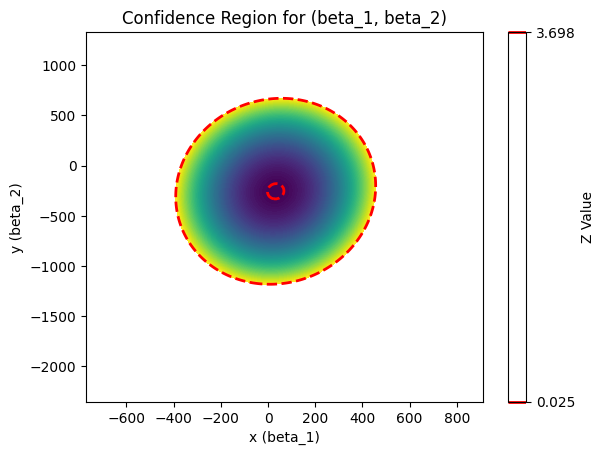

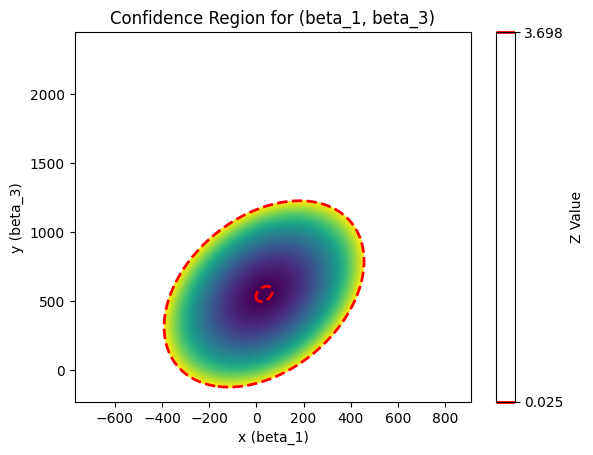

In [77]:
q = 2
qf_alpha_2 = stats.f.ppf(alpha / 2, dfn=q, dfd=deg_freed)
qf_1_alpha_2 = stats.f.ppf(1 - alpha / 2, dfn=q, dfd=deg_freed)

def find_interval(i, j, beta_i, beta_j):
    matrix_A = np.zeros((q, p+1))
    matrix_A[0,i] = 1
    matrix_A[1,j] = 1
    beta = np.zeros(p+1)
    beta[i] = beta_i
    beta[j] = beta_j
    mult_A_dif_beta = np.matmul(matrix_A, (beta_hat - beta))

    central_term = np.linalg.inv(np.matmul(np.matmul(matrix_A, inversed_zt_z), np.transpose(matrix_A)))

    value = np.matmul(np.matmul(np.transpose(mult_A_dif_beta), central_term), mult_A_dif_beta)/(q*sigma_hat**2)
    return value


def graph_betas(i, j):
    if i == j:
        raise ValueError()
    # Generate a grid of (x, y) values
    x_vals = np.linspace(-5000, 5000, 1000)
    y_vals = np.linspace(-5000, 5000, 1000)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Calculate the find_interval values for each (x, y)
    Z = np.array([[find_interval(i, j, x, y) for x in x_vals] for y in y_vals])

    # Find the indices where Z is between qf_alpha_2 and qf_1_alpha_2
    valid_region = (Z >= qf_alpha_2) & (Z <= qf_1_alpha_2)

    # Get the x and y values that fall within the valid region
    X_valid = X[valid_region]
    Y_valid = Y[valid_region]

    # Find the bounds of the valid region
    x_min, x_max = np.min(X_valid), np.max(X_valid)
    y_min, y_max = np.min(Y_valid), np.max(Y_valid)

    # Plot the region where qf_alpha_2 <= Z <= qf_1_alpha_2
    plt.contourf(X, Y, Z, levels=np.linspace(np.min(Z), qf_1_alpha_2, 100), cmap='viridis')

    # Add the contour for the region of interest
    plt.contour(X, Y, Z, levels=[qf_alpha_2, qf_1_alpha_2], colors='red', linestyles='--', linewidths=2)

    # Adjust the limits to focus on the region where the red contour exists
    scale = 2
    plt.xlim([scale*x_min, scale*x_max])
    plt.ylim([scale*y_min, scale*y_max])

    plt.colorbar(label='Z Value')
    plt.title(f"Confidence Region for (beta_{i+1}, beta_{j+1})")
    plt.xlabel(f"x (beta_{i+1})")
    plt.ylabel(f"y (beta_{j+1})")
    plt.show()

graph_betas(0,1)

graph_betas(0,2)



### Question 2.4:
Nous allons vérifier si:

1- O3 est influencée par Vx. En ce cas, nous proposons les hypothèses suivantes: $H^{1}_{0}: \beta_{2} \neq 0$ contre $H^{1}_{1}: \beta_{2} = 0$. Ou, en utilisant la notation de l'exercice 17, nous avons: $H^{1}_{0}: \beta^{T}x \neq 0$ contre $H^{1}_{1}: \beta^{T}x= 0$ avec $x = (0, 1, 0, 0)$.

2- O3 est influencée par Ne12. En ce cas, nous proposons les hypothèses suivantes: $H^{2}_{0}: \beta_{3} \neq 0$ contre $H^{2}_{1}: \beta_{3} = 0$. Ou, en utilisant la notation de l'exercice 17, nous avons: $H^{2}_{0}: \beta^{T}x \neq 0$ contre $H^{2}_{1}: \beta^{T}x= 0$ avec $x = (0, 0, 1, 0)$.

3- O3 est influencée par Vx ou T12. En ce cas, nous proposons les hypothèses suivantes: $H^{3}_{0}: \beta_{1} \neq 0 \lor \beta_{2} \neq 0$ contre $H^{3}_{1}: \beta_{1} = 0 \land \beta_{2} = 0$. Ou, en utilisant la notation de l'exercice 17, nous avons: $H^{3}_{0}: \beta^{T}x \neq 0$ contre $H^{3}_{1}: \beta^{T}x= 0$ avec $x = (1, 1, 0, 0)$.



### Question 2.5:


De façon analogue à la question 17, on trouve le test suivant:

$\phi(Y) = \mathbb{I}_{\left\{\frac{x^{T}\hat{\beta}}{\hat{\sigma}\sqrt{x^{T}(Z^{T}Z)^{-1}x}}<= q^{n-p}_{1-\alpha/2}\right\}}$


In [73]:


def hyp_test(x):
    value = np.matmul(np.transpose(x), beta_hat)/sigma_hat*np.sqrt(np.matmul(np.matmul(np.transpose(x), inversed_zt_z), x))
    return value <= q_1_alpha_2


x1 = np.zeros(p+1)
x1[1] = 1
result1 = hyp_test(x1)
print(f"The result of the first test is: {result1}. So, the hypothese H_{'0' if result1 else '1'} was confirmed")

x2 = np.zeros(p+1)
x2[2] = 1
result2 = hyp_test(x2)
print(f"The result of the first test is: {result2}. So, the hypothese H_{'0' if result2 else '1'} was confirmed")

x3 = np.zeros(p+1)
x3[0] = 1
x3[1] = 1
result3 = hyp_test(x3)
print(f"The result of the first test is: {result3}. So, the hypothese H_{'0' if result3 else '1'} was confirmed")


The result of the first test is: True. So, the hypothese H_0 was confirmed
The result of the first test is: True. So, the hypothese H_0 was confirmed
The result of the first test is: True. So, the hypothese H_0 was confirmed


### Question 2.6:

En analysant les résultats des tests d'hypothèse, nous pouvons affirmer avec plus de conviction que toutes les variables analysées exercent en effet une influence significative sur les valeurs de O3, la variable d'intérêt. Autrement dit, leur coefficient dans l'analyse considérée ne devrait pas être nul. Ces résultats ont été obtenus à partir de tests d'hypothèse menés avec un niveau de confiance de 95% dans la question 2.5, ce qui confère de la solidité à nos conclusions.

De plus, en examinant les graphiques générés dans la question 2.3, qui forment clairement des couronnes elliptiques comme prévu par la théorie, nous remarquons que les points (0,0) sont inclus dans les régions de confiance proposées. Ce fait pourrait initialement nous amener à une interprétation erronée, suggérant que l'hypothèse nulle devrait être rejetée. Cependant, il est essentiel de rappeler que, bien que liés, les concepts de test d'hypothèse et de région de confiance sont distincts. Le test d'hypothèse, notamment dans le cadre des conclusions statistiques, est l'outil le plus approprié pour la décision finale, tandis que les régions de confiance offrent une interprétation plus large et visuelle. Ainsi, il n'y a pas de contradiction dans les résultats obtenus.